# Using Archived Surface Data from Iowa State

This notebook covers reading in a surface data file from the Iowa State archive that is obtained by running the Python script available in `valpo_courses/wxtech` called `download_archived_surface_data.py`

In [1]:
from datetime import datetime, timedelta

import metpy.calc as mpcalc
from metpy.plots import declarative, wx_code_to_numeric
from metpy.units import units
import pandas as pd

In [4]:
date = datetime(2012, 8, 1)

# Read in data downloaded from download_archived_surface_data.py script
# Copy script from valpo_courses/wxtech to your work directory and run
# If you are in your working directory from a terminal prompt, type
#     cp ../valpo_courses/wxtech/download_archived_surface_data.py .

# You'll need to modify the path of the file below, this is set up to work
# with example data in the data directory, which has been downloaded using
# the script mentioned above.
df = pd.read_csv(f'../data/surface_data_{date:%Y%m%d}.csv', header=0,
                 parse_dates=['valid'], na_values=['M'],
                 low_memory=False)

In [5]:
list(df.keys())

['station',
 'valid',
 'lon',
 'lat',
 'elevation',
 'tmpf',
 'dwpf',
 'relh',
 'drct',
 'sknt',
 'p01i',
 'alti',
 'mslp',
 'vsby',
 'gust',
 'skyc1',
 'skyc2',
 'skyc3',
 'skyc4',
 'skyl1',
 'skyl2',
 'skyl3',
 'skyl4',
 'wxcodes',
 'ice_accretion_1hr',
 'ice_accretion_3hr',
 'ice_accretion_6hr',
 'peak_wind_gust',
 'peak_wind_drct',
 'peak_wind_time',
 'feel',
 'metar',
 'present_weather',
 'cloud_cover',
 'eastward_wind',
 'northward_wind',
 'air_pressure_at_sea_level']

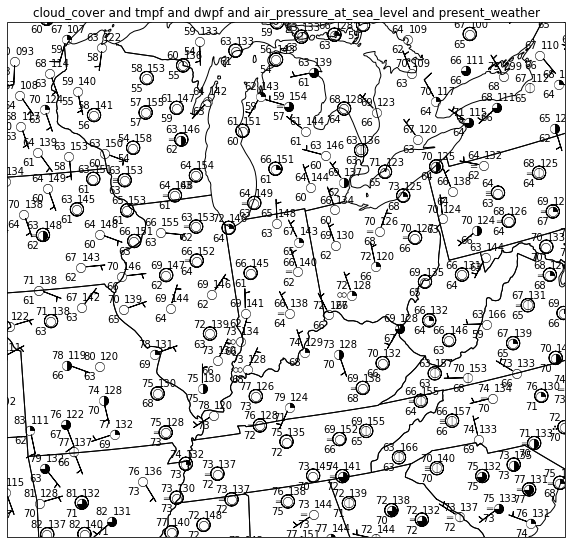

In [19]:
mslp_formatter = lambda v: format(v*10, '.0f')[-3:]

# Set some subset parameters to reduce number of
# observations used for plotting

# subset_lat via a northern and southern latitude
subset_lat = ((df.lat < 50) & (df.lat > 20))
# subset_lon via a eastern and western longitude
subset_lon = ((df.lon < -70) & (df.lon > -100))

plot_time = datetime(2012, 8, 1, 12)

# Plot desired data
obs = declarative.PlotObs()
# Use subsets to reduce number of points that can be used to be plotted
obs.data = df[subset_lat & subset_lon]
obs.time = plot_time
# Note you may have to reduce the time_window if there
# are too many observations 
obs.time_window = timedelta(minutes=15)
obs.level = None
obs.fields = ['cloud_cover', 'tmpf', 'dwpf',
              'air_pressure_at_sea_level', 'present_weather']
obs.locations = ['C', 'NW', 'SW', 'NE', 'W']
obs.formats = ['sky_cover', None, None, mslp_formatter, 'current_weather']
obs.reduce_points = .75
obs.vector_field = ['eastward_wind', 'northward_wind']

# Panel for plot with Map features
panel = declarative.MapPanel()
panel.layout = (1, 1, 1)
panel.projection = 'lcc'
panel.area = 'in'
panel.layers = ['states']
panel.plots = [obs]

# Bringing it all together
pc = declarative.PanelContainer()
pc.size = (10, 10)
pc.panels = [panel]

pc.show()